In this project we will analyze the data of the more than **1,338,000** bike trips done in 2023 in the city of Vancouver, Canada using Mobi (Vancouver Bike Share service). Let's deep dive in the data to find out the following: 

**1. How much did people ride a bike using Mobi (in kilometers)?**\
**2. What were the busiest stations?**\
**3. Did the temperature impact peoples' choice to cycle?**


In [29]:
# Import libraries
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading Data and Creating Dataframe

In [2]:
# Get CSV files list from a folder
file_path = '/Users/tadi/DIEGO/Data Analysis/Data Analysis Projects/Mobi Shaw Vancouver/Mobi Datasets 2023'
csv_files = glob.glob(file_path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, encoding = "ISO-8859-1", low_memory=False, parse_dates=['Departure', 'Return']) for file in csv_files)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Bike
0,2023-09-01,2023-09-01,False,0137 Beach & Seymour,0142 Beach & Cardero,365 Day Founding Standard,1509.0,377.0,17.0,20.0,0.0,0.0,NaN
1,2023-09-01,2023-09-01,False,0063 Robson & Granville,0217 Smithe & Burrard,365 Corporate Plus Renewal,479.0,253.0,18.0,17.0,0.0,0.0,NaN
2,2023-09-01,2023-09-01,True,0021 Cordova & Granville,0193 Science World,Community Pass E-bike (PWD),3042.0,965.0,15.0,18.0,0.0,0.0,NaN
3,2023-09-01,2023-09-01,False,0105 Stanley Park - Totem Poles,0105 Stanley Park - Totem Poles,Pay Per Ride,1182.0,1415.0,17.0,16.0,0.0,0.0,NaN
4,2023-09-01,2023-09-01,False,0064 Expo & Smithe,0053 Keefer & Abbott,365 Day Pass Plus,743.0,266.0,19.0,19.0,0.0,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503912 entries, 0 to 1503911
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Departure                  1340331 non-null  datetime64[ns]
 1   Return                     1340203 non-null  datetime64[ns]
 2   Electric bike              1340331 non-null  object        
 3   Departure station          1340305 non-null  object        
 4   Return station             1340119 non-null  object        
 5   Membership type            1338085 non-null  object        
 6   Covered distance (m)       1340331 non-null  float64       
 7   Duration (sec.)            1340331 non-null  float64       
 8   Departure temperature (C)  1340331 non-null  float64       
 9   Return temperature (C)     1340331 non-null  float64       
 10  Stopover duration (sec.)   1340331 non-null  float64       
 11  Number of stopovers        1340331 no

In [5]:
# Checking for missing values
df.isna().sum()

Departure                     163581
Return                        163709
Electric bike                 163581
Departure station             163607
Return station                163793
Membership type               165827
Covered distance (m)          163581
Duration (sec.)               163581
Departure temperature (C)     163581
Return temperature (C)        163581
Stopover duration (sec.)      163581
Number of stopovers           163581
Bike                         1254311
dtype: int64

In [6]:
# Droping Bike column missing more than 80% of the values
df.drop(columns='Bike', inplace=True)
df.isna().sum()

Departure                    163581
Return                       163709
Electric bike                163581
Departure station            163607
Return station               163793
Membership type              165827
Covered distance (m)         163581
Duration (sec.)              163581
Departure temperature (C)    163581
Return temperature (C)       163581
Stopover duration (sec.)     163581
Number of stopovers          163581
dtype: int64

In [7]:
# Drop rows missing Departure or Return date. Missing any of these dates there are no other relevante data
df.dropna(subset=['Departure', 'Return'], inplace=True)
df.isna().sum()

Departure                       0
Return                          0
Electric bike                   0
Departure station              26
Return station                 84
Membership type              2118
Covered distance (m)            0
Duration (sec.)                 0
Departure temperature (C)       0
Return temperature (C)          0
Stopover duration (sec.)        0
Number of stopovers             0
dtype: int64

In [8]:
# Drop rows missing Departure station, Return station, and Membership type
df.dropna(subset=['Departure station', 'Return station', 'Membership type'], inplace=True)
df.isna().sum()

Departure                    0
Return                       0
Electric bike                0
Departure station            0
Return station               0
Membership type              0
Covered distance (m)         0
Duration (sec.)              0
Departure temperature (C)    0
Return temperature (C)       0
Stopover duration (sec.)     0
Number of stopovers          0
dtype: int64

In [9]:
# Checking dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338001 entries, 0 to 1503911
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Departure                  1338001 non-null  datetime64[ns]
 1   Return                     1338001 non-null  datetime64[ns]
 2   Electric bike              1338001 non-null  object        
 3   Departure station          1338001 non-null  object        
 4   Return station             1338001 non-null  object        
 5   Membership type            1338001 non-null  object        
 6   Covered distance (m)       1338001 non-null  float64       
 7   Duration (sec.)            1338001 non-null  float64       
 8   Departure temperature (C)  1338001 non-null  float64       
 9   Return temperature (C)     1338001 non-null  float64       
 10  Stopover duration (sec.)   1338001 non-null  float64       
 11  Number of stopovers        1338001 no

In [10]:
print(f'Numbers of stations {df["Departure station"].nunique()}')

Numbers of stations 273


**1. How much did people ride a bike using Mobi?**

In [11]:
dist_travel_km = round(df["Covered distance (m)"].sum() / 1000, 2)
print(f'Total distance traveled in 2023 was {dist_travel_km :,} kilometers')

Total distance traveled in 2023 was 3,768,867.85 kilometers


## Analyzing Data

**2. What were the busiest departure and return stations?**

In [12]:
# Trips per station. Which were the busiest departure stations?
df.value_counts("Departure station").head(10).rank(ascending=False)

Departure station
0209 Stanley Park - Information Booth           1.0
0105 Stanley Park - Totem Poles                 2.0
0028 Davie & Beach                              3.0
0102 Stanley Park - Second Beach North          4.0
0103 Stanley Park - Third Beach Parking Lot     5.0
0104 Stanley Park - Second Beach South          6.0
0187 Bute & Davie                               7.0
0196 Hornby & Drake                             8.0
0193 Science World                              9.0
0189 Granville Island                          10.0
dtype: float64

In [13]:
# Trips per station. Which were the busiest return stations?
df.value_counts("Return station").head(10).rank(ascending=False)

Return station
0209 Stanley Park - Information Booth           1.0
0028 Davie & Beach                              2.0
0102 Stanley Park - Second Beach North          3.0
0103 Stanley Park - Third Beach Parking Lot     4.0
0105 Stanley Park - Totem Poles                 5.0
0104 Stanley Park - Second Beach South          6.0
0189 Granville Island                           7.0
0011 Ontario & Seawall                          8.0
0193 Science World                              9.0
0014 Canada Place                              10.0
dtype: float64

In [14]:
# Trips per month
df['Month'] = df['Departure'].dt.month
trips_month = df.groupby('Month')['Departure'].count()
trips_month

Month
1      48027
2      45764
3      72465
4      74885
5     140171
6     157688
7     201263
8     192161
9     156016
10    110782
11     78793
12     59986
Name: Departure, dtype: int64

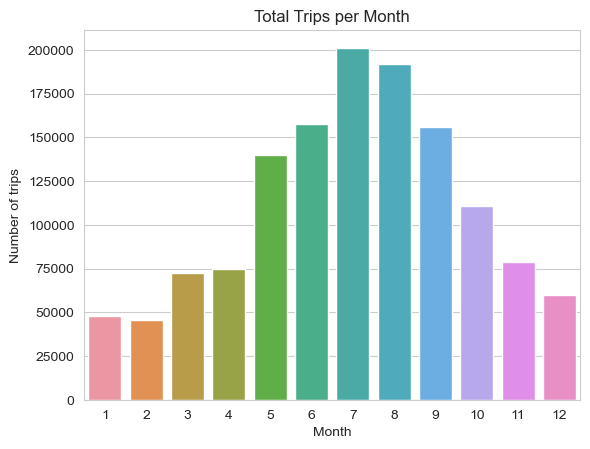

In [46]:
# Trips per month
g1 = sns.countplot(data=df, x='Month')
g1.set_title("Total Trips per Month")
g1.set(ylabel="Number of trips")
sns.set_style("whitegrid")
plt.show()

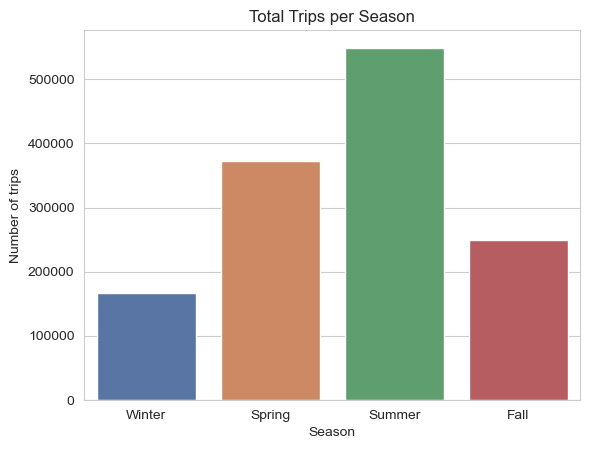

In [45]:
# Trips pe season
# Create a dictionary to map month to season
seasons = {1: 'Winter',
           2: 'Winter',
           3: 'Winter',
           4: 'Spring',
           5: 'Spring',
           6: 'Spring',
           7: 'Summer',
           8: 'Summer',
           9: 'Summer',
           10:'Fall',
           11:'Fall',
           12:'Fall'
          }
df['Season'] = df['Month'].map(seasons)
g2 = sns.countplot(data=df, x='Season', order=['Winter', 'Spring', 'Summer', 'Fall'])
g2.set_title("Total Trips per Season")
g2.set(ylabel="Number of trips")
plt.show()

In [17]:
# Time spent riding 
duration_h = round(df['Duration (sec.)'].sum() / 60, 2)
print(f'Total time riding {duration_h :,} hours')

Total time riding 27,898,601.73 hours


In [18]:
# Memberships type per ride
memb = df.groupby('Membership type')['Membership type'].count().sort_values(ascending=False)
memb

Membership type
Pay Per Ride                           284406
365 Day Pass Standard                  199106
30 Day Pass                            170718
365 Day Pass Plus                      131538
24 Hour                                117910
365 Corporate Plus Renewal              52058
365 Corporate Plus                      49172
365 Day Pass Plus SALE                  47067
365 Corporate Standard                  42441
365 Day Pass Standard SALE              40477
Community Pass                          36425
VIP                                     34428
Community Pass E-bike                   31319
Community Pass E-bike (PWD)             30897
365 Corporate Standard Renewal          23595
365 Day Founding Standard               20477
365 Day Founding Plus                   20360
UBC Inclusive Corporate Pass             3880
Archived Monthly Standard                 770
Herbaland Pass                            377
Archived Monthly Plus                     327
Maintenance       

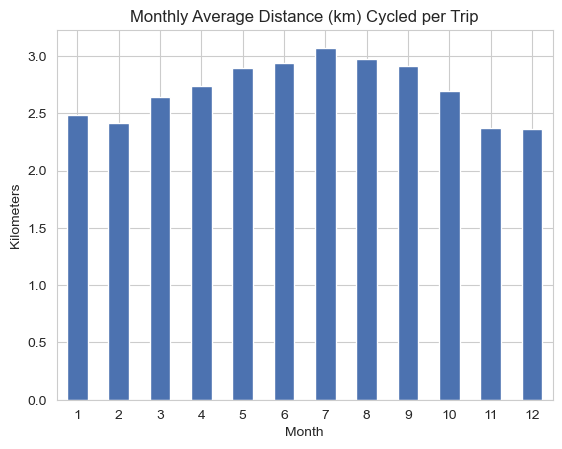

In [47]:
# Monthly average distance (km) per ride
dist_month = df.groupby("Month")['Covered distance (m)'].mean()/1000 # Distance in kilometers
g3 = dist_month.plot.bar() 
g3.set_title('Monthly Average Distance (km) Cycled per Trip')
plt.xticks(rotation=0)
g3.set(ylabel='Kilometers')
plt.show()

In [20]:
# Did people ride more on high temperature days or less on cold days?
dist_by_temp = df.groupby("Departure temperature (C)")['Covered distance (m)'].mean()/1000 # Distance in kilometers
dist_by_temp

Departure temperature (C)
-9.0     5.095000
-8.0     2.826750
-7.0     1.791043
-6.0     2.233550
-5.0     2.301963
           ...   
 47.0    3.187083
 48.0    2.339905
 49.0    2.689188
 50.0    0.997667
 51.0    0.071000
Name: Covered distance (m), Length: 61, dtype: float64

### Temperature registered does not seems to be reliable. By official source maximum temperature in Vancouver in 2023 was 29.3°C and minimum was -3.2°C.
Source: https://climate.weather.gc.ca/climate_data/daily_data_e.html

In [21]:
# Merging oficial temperature records to dataframe
ofc_temp = pd.read_csv('/Users/tadi/DIEGO/Data Analysis/Data Analysis Projects/Mobi Shaw Vancouver/en_climate_daily_BC_1108446_2023_P1D.csv', usecols= ['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)'], parse_dates=['Date/Time'])
ofc_temp.rename(columns={"Date/Time": "Departure"}, inplace=True) # Renaming temperature dataframe column name to match Mobi dataframe column name
df_ofc_temp = pd.merge(df, ofc_temp, on='Departure')
df_ofc_temp.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month,Season,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
0,2023-09-01,2023-09-01,False,0137 Beach & Seymour,0142 Beach & Cardero,365 Day Founding Standard,1509.0,377.0,17.0,20.0,0.0,0.0,9,Summer,22.5,13.3,17.9
1,2023-09-01,2023-09-01,False,0063 Robson & Granville,0217 Smithe & Burrard,365 Corporate Plus Renewal,479.0,253.0,18.0,17.0,0.0,0.0,9,Summer,22.5,13.3,17.9
2,2023-09-01,2023-09-01,True,0021 Cordova & Granville,0193 Science World,Community Pass E-bike (PWD),3042.0,965.0,15.0,18.0,0.0,0.0,9,Summer,22.5,13.3,17.9
3,2023-09-01,2023-09-01,False,0105 Stanley Park - Totem Poles,0105 Stanley Park - Totem Poles,Pay Per Ride,1182.0,1415.0,17.0,16.0,0.0,0.0,9,Summer,22.5,13.3,17.9
4,2023-09-01,2023-09-01,False,0064 Expo & Smithe,0053 Keefer & Abbott,365 Day Pass Plus,743.0,266.0,19.0,19.0,0.0,0.0,9,Summer,22.5,13.3,17.9


In [22]:
# Does people ride more on high temperature days or less on cold days? Redoing analysis using official temperature records
# Using day mean average temperature for the simplicity of this project 
avg_dist_temp = df_ofc_temp.groupby("Mean Temp (°C)")['Covered distance (m)'].mean() / 1000
avg_dist_temp

Mean Temp (°C)
-1.5     1.711333
 0.2     1.813875
 0.7     1.705577
 1.0     1.521900
 1.3     1.602300
           ...   
 22.4    2.440357
 22.6    2.680673
 22.7    2.233148
 22.9    2.915992
 23.0    2.702300
Name: Covered distance (m), Length: 168, dtype: float64

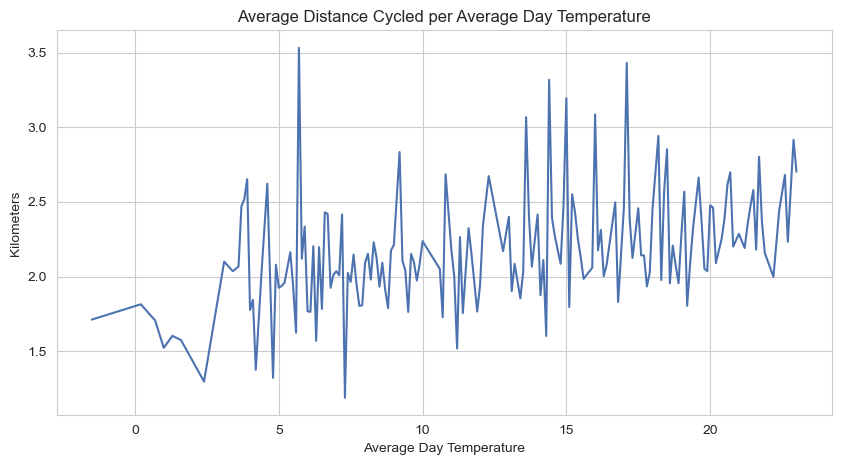

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
avg_dist_temp.plot()
ax.set_title("Average Distance Cycled per Average Day Temperature")
ax.set(ylabel="Kilometers",
       xlabel="Average Day Temperature")
plt.show()

**3. Did the temperature impact peoples' choice to cycle?**

As showed on the fisrt two charts, there is a significant increase in the number of trips during summer time in relation to winter, althought the average distance rode had little change regardless the day average temperature. 